# Task 5 Sales Prediction Using Python

# Import All important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/ayush.singh/Desktop/Obss/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1 , inplace = True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Exploratory Data Analysis (EDA)

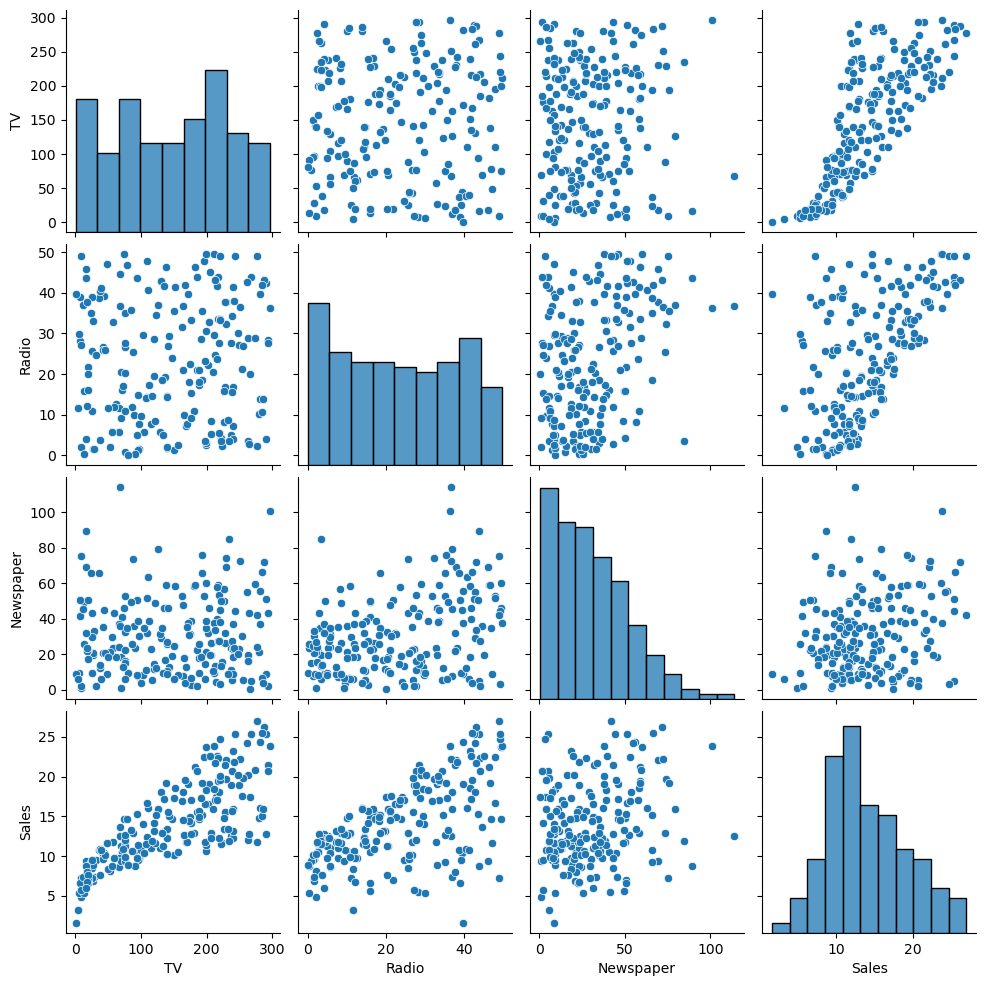

In [9]:
sns.pairplot(df)
plt.show()

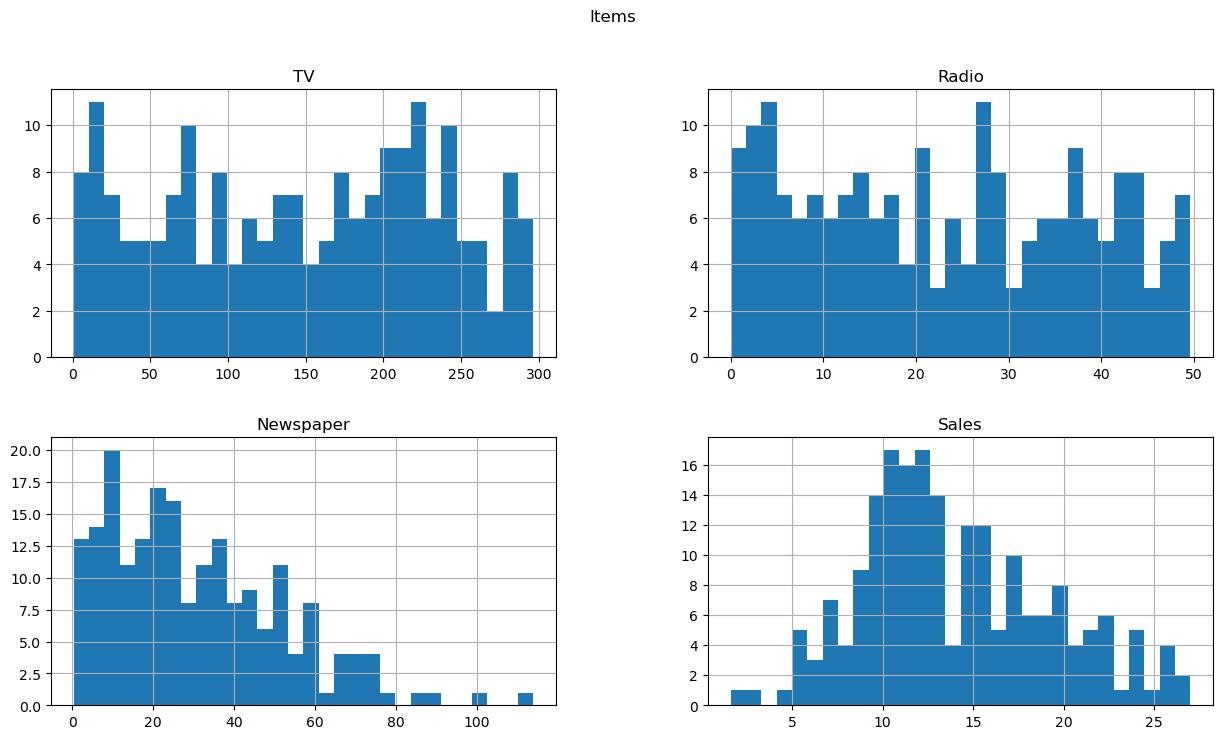

In [12]:
df.hist(bins=30,figsize=(15,8))
plt.suptitle('Items')
plt.show()

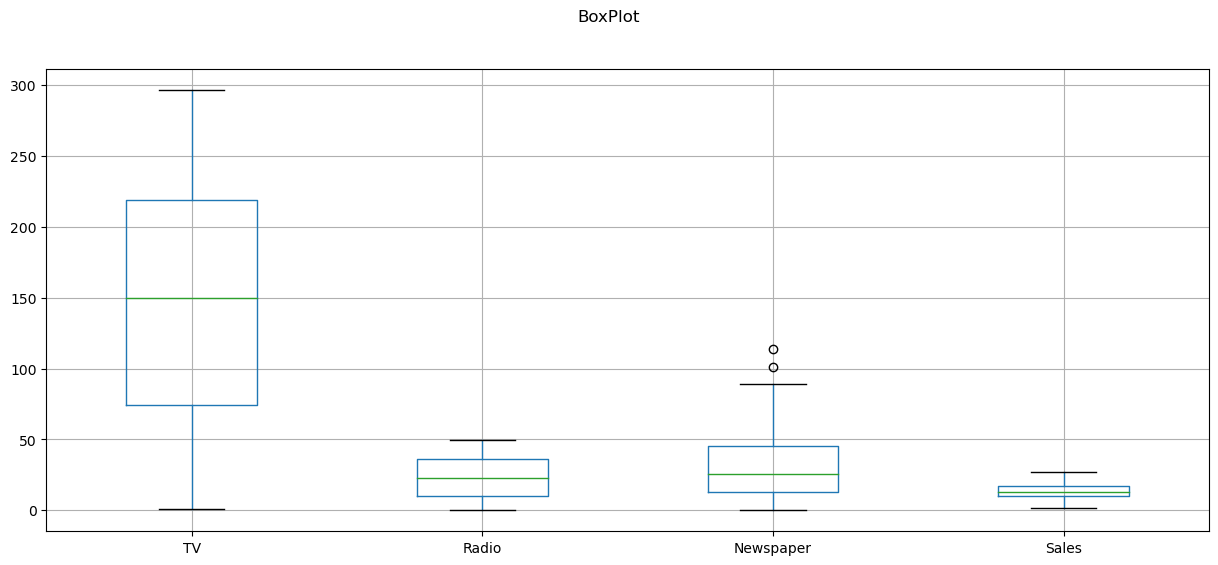

In [13]:
df.boxplot(figsize=(15,6))
plt.suptitle('BoxPlot')
plt.show()

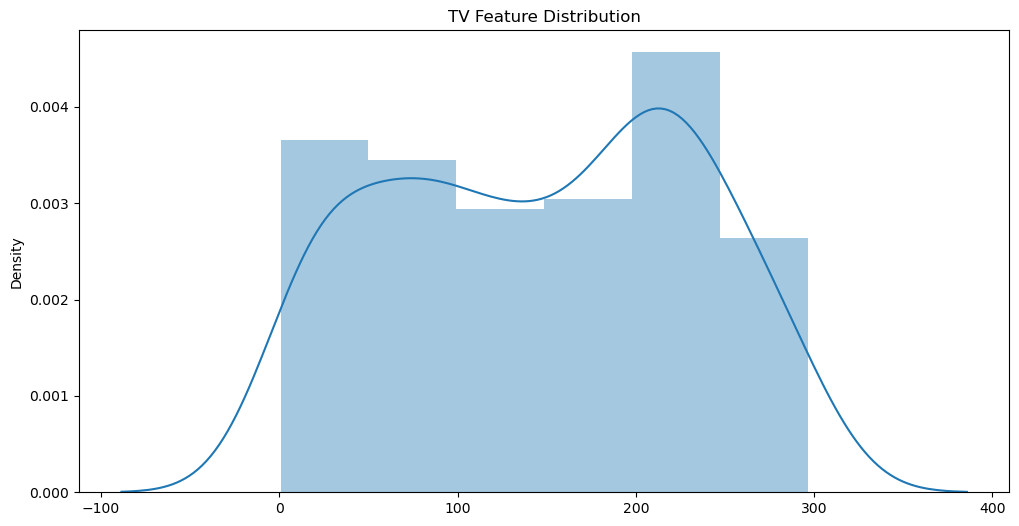

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['TV'],kde=True)
plt.title('TV Feature Distribution')
plt.show()

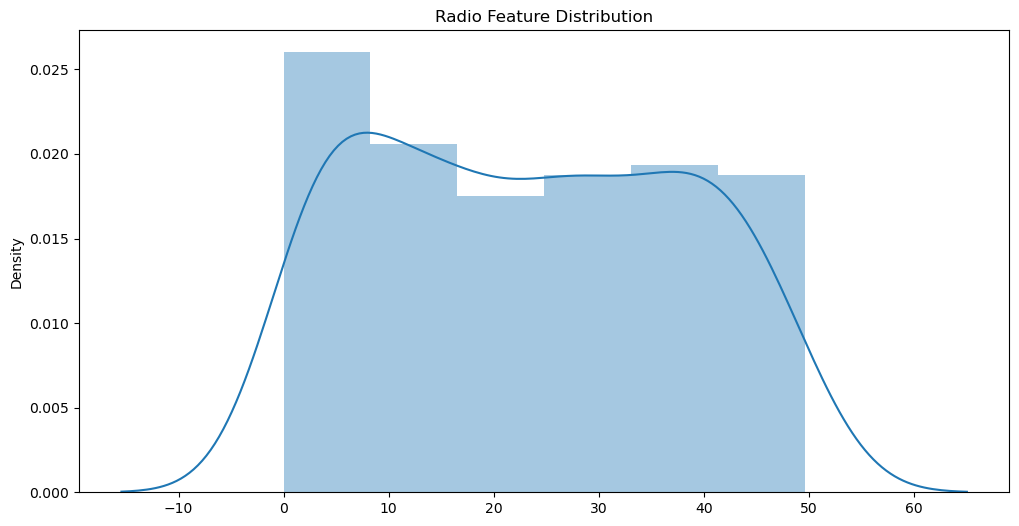

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Radio'],kde=True)
plt.title('Radio Feature Distribution')
plt.show()

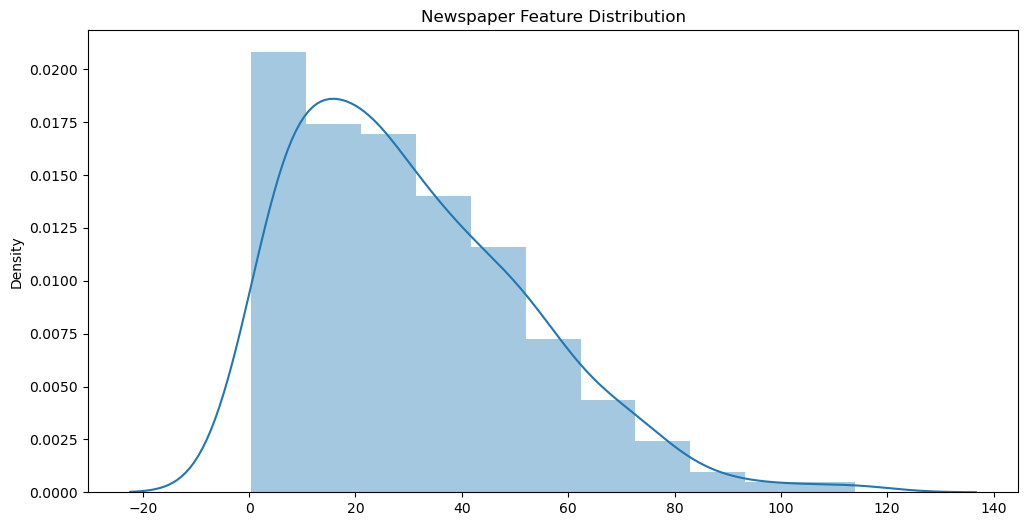

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Newspaper'],kde=True)
plt.title('Newspaper Feature Distribution')
plt.show()

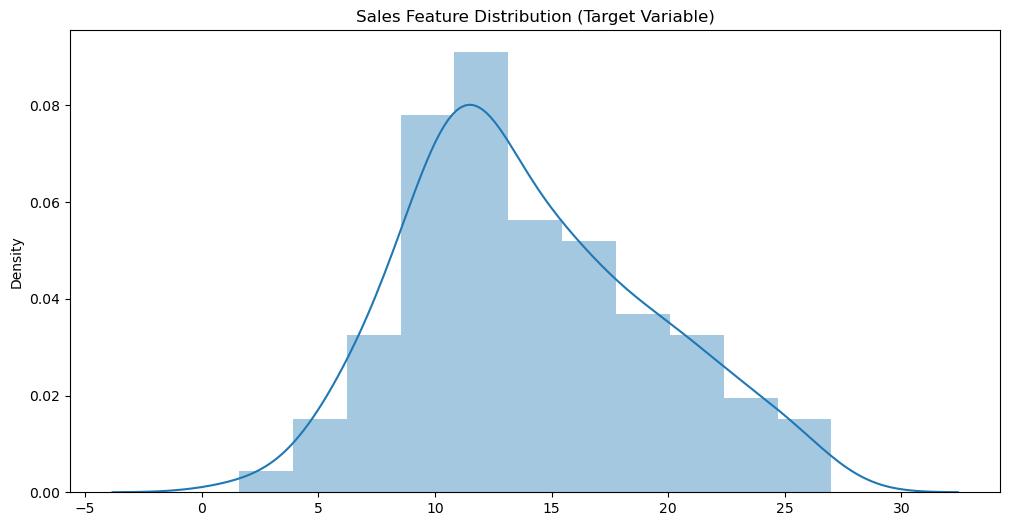

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Sales'],kde=True)
plt.title('Sales Feature Distribution (Target Variable)')
plt.show()

Text(0.5, 1.0, 'Heatmap of DataFrame')

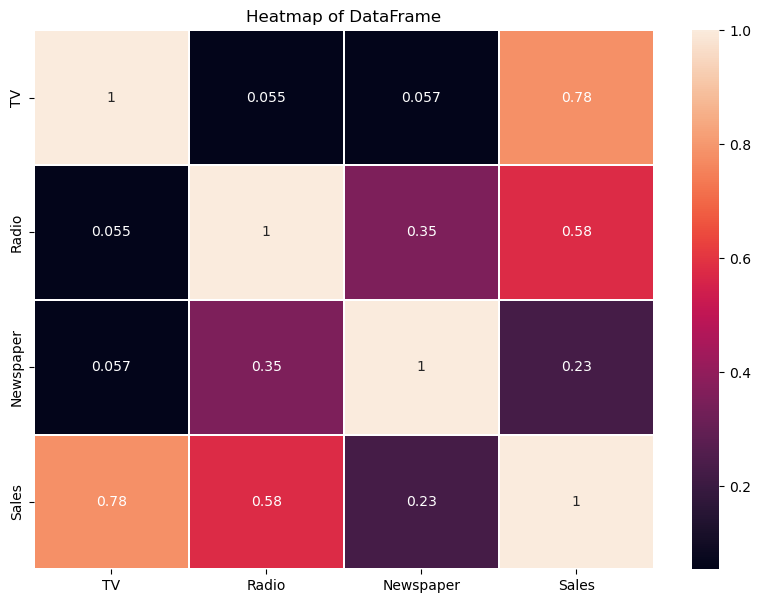

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Heatmap of DataFrame')

Text(0.5, 1.0, 'Correlation Plot of All Features')

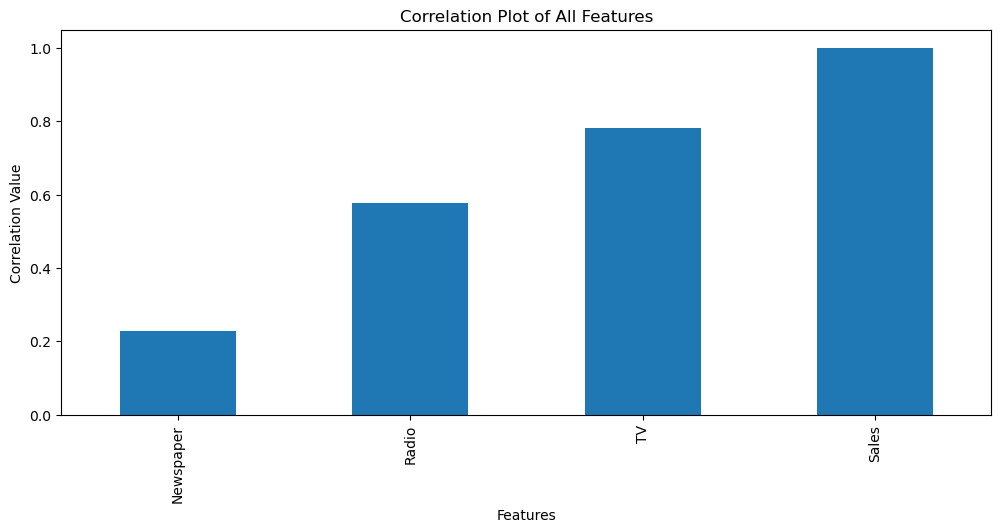

In [19]:
plt.figure(figsize=(12,5))
df.corr()['Sales'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation Plot of All Features')

# Split Data set

In [20]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Model Training

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.score(X_test,y_test)

0.915173411602795

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
dtree.score(X_test,y_test)

0.9379465343535436

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [31]:
lr = LinearRegression()
dtree = DecisionTreeRegressor()
rfr = RandomForestRegressor()

# Evaluating best Model for our Problem using MSE

In [32]:
models_name = ['Linear Reg', 'Decision Tree', 'Random forest']
models_obj = [lr, dtree, rfr] 


for i,j in zip(models_name,models_obj):
  j.fit(X_train,y_train)
  pred = j.predict(X_test)
  print(f'MSE for {i}: {mean_squared_error(y_test,pred):.2f}')

MSE for Linear Reg: 2.55
MSE for Decision Tree: 1.67
MSE for Random forest: 0.68


# Random Forest Model

In [33]:
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

In [34]:
differ = pd.DataFrame({'Actual Sales':y_test,'Prediction Sales':rfr_pred,'Difference':(y_test - rfr_pred)})
differ.head(10)

,Actual Sales,Prediction Sales,Difference
143,10.4,10.253,0.147
81,12.3,12.402,-0.102
26,15.0,16.472,-1.472
150,16.1,15.226,0.874
124,19.7,20.141,-0.441
24,9.7,9.327,0.373
126,6.6,6.204,0.396
142,20.1,19.852,0.248
129,9.7,9.520,0.180
171,14.5,14.486,0.014


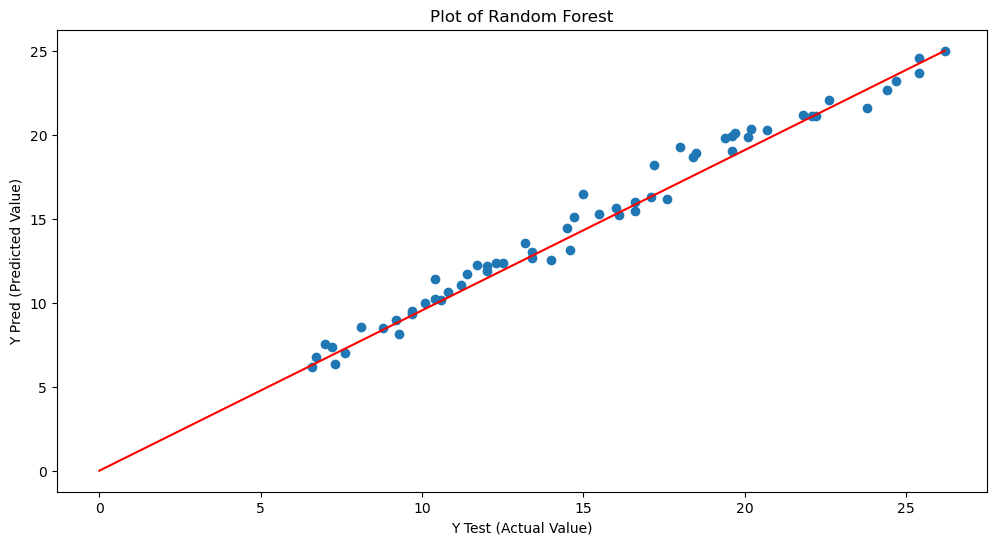

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,rfr_pred)
plt.plot([0,max(y_test)],[0,max(rfr_pred)],color='r')
plt.title('Plot of Random Forest')
plt.xlabel('Y Test (Actual Value)')
plt.ylabel('Y Pred (Predicted Value)')
plt.show()

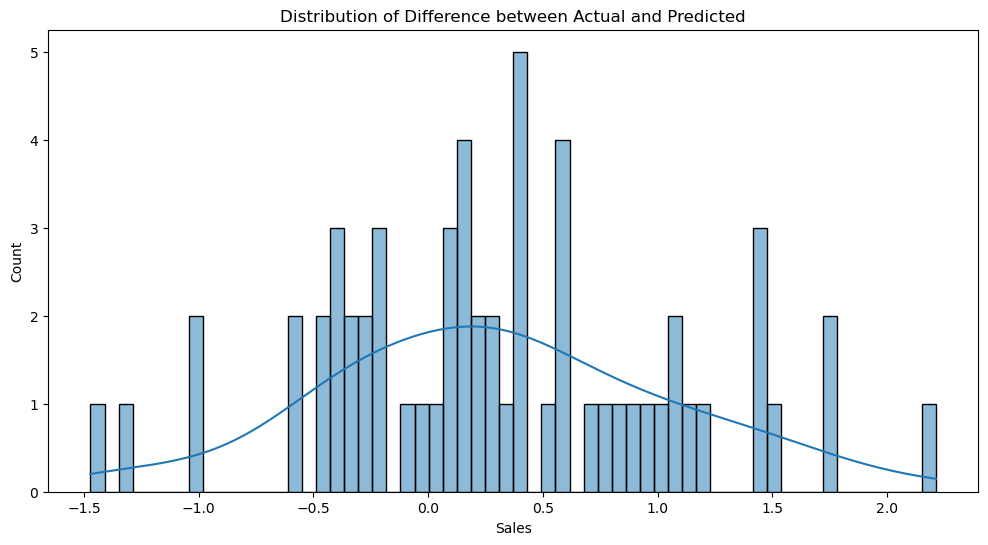

In [37]:
plt.figure(figsize=(12,6))
sns.histplot((y_test - rfr_pred),bins=60,kde=True)
plt.title('Distribution of Difference between Actual and Predicted')
plt.show()

In [39]:
print(f'MSE of Model: {mean_squared_error(y_test,rfr_pred):.2f}')
print(f'MAE of Model: {mean_absolute_error(y_test,rfr_pred):.2f}')
print(f'RMSE of Model: {np.sqrt(mean_squared_error(y_test,rfr_pred)):.2f}')
print('\nVariance Score: ',r2_score(y_test,rfr_pred))

MSE of Model: 0.66
MAE of Model: 0.64
RMSE of Model: 0.81

Variance Score:  0.9780083938905446


In [40]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficent'])
coeff_df

,Coefficent
TV,0.044424
Radio,0.178711
Newspaper,0.005127


In [41]:
rfr.predict([[160.1,27.8,49.2]])

array([16.69])